# Laboratory Work: Pichu and Pikachu Classification

## 1. Test points classification

In this laboratory exercise, we will use data on the lengths and widths of Pichus and Pikachus to develop an algorithm for classifying new data points.

### Loading Data
Let's begin by loading the data.

In [124]:
import pandas as pd
import numpy as np

pok = pd.read_csv(".\\datapoints.txt")

# as for now, I feel more convenient with the visualization of arrays rather than data frames
numpok = pok.to_numpy()

# as the separator was "," there was the fourth column "1-pikachu" with no data, which I will just drop.
pokemon = numpok[:,:-1]
print (pokemon[:5])

# the first column is width, the second is height and the third is the label
# 0 is pichu, 1 is pikachu

[[21.9593845  31.23956701  0.        ]
 [23.63591632 36.46821491  1.        ]
 [17.71405642 31.44170391  0.        ]
 [21.78020032 33.21339776  1.        ]
 [25.20630553 36.55881615  1.        ]]


###  Data Visualization
For visualization purposes, we will plot all the data points, assigning a unique color to each class.


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Mary\AppData\Local\Temp\ipykernel_7000\851522417.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(pokemon[:,0], pokemon[:,1], s = 20, c = pokemon[:,2], cmap = plt.cm.get_cmap("viridis", 2))


Text(0, 0.5, 'Height')

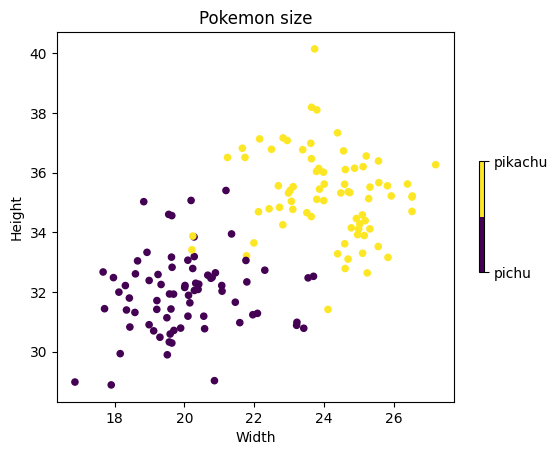

In [111]:
# ranges in the square brackets (pokemon []) is going to be: [rows, columns], as the 1st dimension is rows and the 2nd is columns

plt.scatter(pokemon[:,0], pokemon[:,1], s = 20, c = pokemon[:,2], cmap = plt.cm.get_cmap("viridis", 2))
cbar = plt.colorbar(shrink = 0.3) 
cbar.set_ticks([0,1])
cbar.set_ticklabels(["pichu", "pikachu"])
plt.title ("Pokemon size")
plt.xlabel("Width")
plt.ylabel("Height")

In [75]:
import csv

with open(".\\testpoints.txt") as file:
    reader = csv.reader(file)
    testpoints = list(reader)

print (testpoints)

[['Test points:'], ['1. (25', ' 32)'], ['2. (24.2', ' 31.5)'], ['3. (22', ' 34)'], ['4. (20.5', ' 34)']]


The output doesn't look like smth I would like to work with, so I guess we need some data manipulations

In [76]:
testpoints.pop(0)
print (testpoints)

[['1. (25', ' 32)'], ['2. (24.2', ' 31.5)'], ['3. (22', ' 34)'], ['4. (20.5', ' 34)']]


In [77]:
for obj in testpoints:
    obj[0] = obj[0][4:]
    obj[1] = obj[1][1:3]
    
print (testpoints)

[['25', '32'], ['24.2', '31'], ['22', '34'], ['20.5', '34']]


In [79]:
# for color matters on the plot

for obj in testpoints:
    obj.append(0.5)
print (testpoints)

[['25', '32', 0.5], ['24.2', '31', 0.5], ['22', '34', 0.5], ['20.5', '34', 0.5]]


Now we are going to add the lines with the new pokemons to the existing ndarray "pokemon". We'll create a new ndarray, called "new_pokemon"

In [87]:
testpoints_2d = np.array(testpoints, dtype=float)
print (testpoints_2d)

[[25.  32.   0.5]
 [24.2 31.   0.5]
 [22.  34.   0.5]
 [20.5 34.   0.5]]


In [100]:
new_pokemon = np.append(pokemon, testpoints_2d, axis = 0)

print(new_pokemon[-7:,:])

[[19.64060341 30.29155673  0.        ]
 [21.98995395 33.64590281  1.        ]
 [22.30210324 32.73237945  0.        ]
 [25.         32.          0.5       ]
 [24.2        31.          0.5       ]
 [22.         34.          0.5       ]
 [20.5        34.          0.5       ]]


Let's add the test data to the plot.

C:\Users\Mary\AppData\Local\Temp\ipykernel_7000\4070733941.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(new_pokemon[:,0], new_pokemon[:,1], s = 30, c = new_pokemon[:,2], cmap = plt.cm.get_cmap("inferno", 3))


Text(0, 0.5, 'Height')

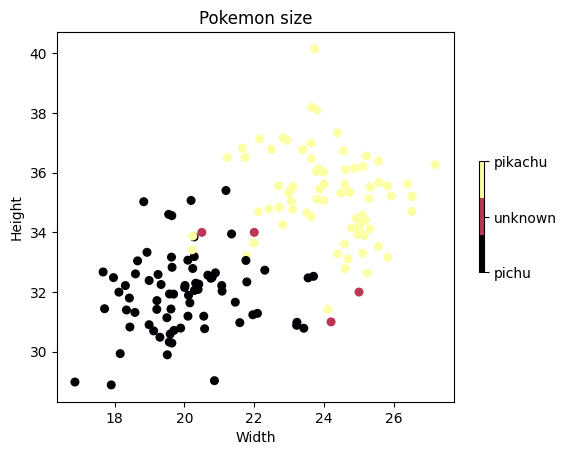

In [112]:
plt.scatter(new_pokemon[:,0], new_pokemon[:,1], s = 30, c = new_pokemon[:,2], cmap = plt.cm.get_cmap("inferno", 3))
cbar = plt.colorbar(shrink = 0.3) 
cbar.set_ticks([0, 0.5, 1])
cbar.set_ticklabels(["pichu", "unknown", "pikachu"])
plt.title ("Pokemon size")
plt.xlabel("Width")
plt.ylabel("Height")

In [125]:
print (testpoints)

print (pokemon[:4,:])

[['25', '32', 0.5], ['24.2', '31', 0.5], ['22', '34', 0.5], ['20.5', '34', 0.5]]
[[21.9593845  31.23956701  0.        ]
 [23.63591632 36.46821491  1.        ]
 [17.71405642 31.44170391  0.        ]
 [21.78020032 33.21339776  1.        ]]


In [153]:
def ordered_distances (point_to_sort, based_on_data=pokemon):
    """
    :param point_to_sort: list - a list containing pokemon-to-classify's parameters: list[0] is width, list[1] is height.
    :param based_on_data: default - pokemon; 2D array, or list of lists, each list having:
      list [0] as a width of a known pokemon, 
      list [1] - lenght of a known pokemon, 
      list [2] - the class label, 0 for pichu, 1 for pikachu 
    :return: list - a list of sorted distances.

    """
    distances = []
    import math
    
    x2 = float(point_to_sort[0])
    y2 = float(point_to_sort[1])

    for pokemons in based_on_data:
        x1 = pokemons[0]
        y1 = pokemons[1]
        lbl = pokemons[2]
        
        distance = math.sqrt((x2-x1)**2+(y2-y1)**2)
        
        #creating a sublist, where the distance to each known pokemon is stored with the labeled pokemon class
        item=[]
        item.append(distance)
        item.append(lbl)
        
        distances.append(item)

    import operator as opr
    distances_list = sorted (distances, key = opr.itemgetter(0))

    return distances_list   
    
    # fix description

In [160]:
def sorting_hat (parameters, distances_list):
    """ 
    Makes a guess based on one nearest neighbour. 
    
    """
    
    nearest_neighbour = distances_list[0][1]
    msg = f"The pokemon with parameters {parameters} looks like "
    if nearest_neighbour == 0:
        print (msg + "pichu")
    elif nearest_neighbour == 1:
        print (msg + "pikachu")
    else:
        print ("This should have never happened. You probably need some data cleaning.")


In [168]:
def decision_multi_neighbours (num_neighbours, parameters, distances_list):
    """
    Classifies the pokemon based on num_neighbours number of neighbours. 
    
    """
   
    more_neighbours = []
    for i in range (num_neighbours):
        more_neighbours.append(distances_list[i][1])

    counter_pichu = 0
    counter_pikachu =0

    for pok in more_neighbours:
        if pok == 0:
            counter_pichu += 1
        elif pok == 1:
            counter_pikachu += 1
        else:
            print ("Address technical support")

    msg = f"Based on {num_neighbours} neighbours, the pokemon with the parameters {parameters} is classified as "
    if counter_pichu > counter_pikachu:
        print(f"{msg} pichu, \naccuracy is {(counter_pichu/num_neighbours)*100:.1f}%\n\n")
    elif counter_pikachu > counter_pichu:
        print (f"{msg} pikachu, \naccuracy is {(counter_pikachu/num_neighbours)*100:.1f}%\n\n")
    else:
        print ("We need more nearest neighbours to decide. Contact your Data Scientist.")

In [158]:
# creating a dictionary, where the key is the pokemon's coordinates and the value is the distance to all the classified points

poks_to_classify = {}

In [159]:
for point in testpoints:
    poks_to_classify[f"w={point[0]}, h={point[1]}"] = ordered_distances(point)
print (poks_to_classify)

{'w=25, h=32': [[0.6829635758323602, 1.0], [0.8829834980050144, 1.0], [1.0623655711316322, 1.0], [1.1483506635878926, 1.0], [1.3042926733824602, 1.0], [1.405938571427235, 0.0], [1.421419952292384, 1.0], [1.4277016205320445, 1.0], [1.5334840155713694, 0.0], [1.6220435525527015, 1.0], [1.6694793213039807, 1.0], [1.9000844105707402, 1.0], [1.92323556047951, 1.0], [1.993526055542498, 0.0], [2.045814476254729, 0.0], [2.105658416262367, 0.0], [2.109813062390686, 1.0], [2.1399677267653545, 1.0], [2.163028256061473, 1.0], [2.2827901216880258, 1.0], [2.4001190857580688, 1.0], [2.4650990240276256, 1.0], [2.5869540314674673, 1.0], [2.795536907095536, 0.0], [2.876152825708887, 1.0], [2.994662999614875, 0.0], [3.0505182472152845, 1.0], [3.098060619590939, 1.0], [3.1342624251608395, 0.0], [3.1372167034396377, 1.0], [3.143582515448482, 1.0], [3.2260589926366356, 1.0], [3.2295550662804375, 0.0], [3.334126822030886, 1.0], [3.3433151410232775, 1.0], [3.3510903150659375, 1.0], [3.358857682258105, 1.0], [

Now we can finally classify our pokemons, using one- or multi- neighbours methods:

In [165]:
for key, value in poks_to_classify.items():
    sorting_hat (key, value)

The pokemon with parameters w=25, h=32 looks like pikachu
The pokemon with parameters w=24.2, h=31 looks like pikachu
The pokemon with parameters w=22, h=34 looks like pikachu
The pokemon with parameters w=20.5, h=34 looks like pichu


In [169]:
num_neighbours = 10

for key, value in poks_to_classify.items():
    decision_multi_neighbours (num_neighbours, key, value)

Based on 10 neighbours, the pokemon with the parameters w=25, h=32 is classified as  pikachu, 
accuracy is 80.0%


Based on 10 neighbours, the pokemon with the parameters w=24.2, h=31 is classified as  pichu, 
accuracy is 60.0%


Based on 10 neighbours, the pokemon with the parameters w=22, h=34 is classified as  pikachu, 
accuracy is 70.0%


Based on 10 neighbours, the pokemon with the parameters w=20.5, h=34 is classified as  pichu, 
accuracy is 80.0%




Which shows that the pokemon with parameters w=24.2, h=31 is 10% probable is pichu, than pikachu, though its first nearest neighbour is pikachu.

## 2. User's input classification.